## AUTHOR : OM CHOKSI 

### Obesity

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

" https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c "

Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Gender: Feature, Categorical, "Gender"
Age : Feature, Continuous, "Age"
Height: Feature, Continuous
Weight: Feature Continuous
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
NCP : Feature, Continuous, " How many main meals do you have daily? "
CAEC : Feature, Categorical, " Do you eat any food between meals? "
SMOKE : Feature, Binary, " Do you smoke? "
CH2O: Feature, Continuous, " How much water do you drink daily? "
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
FAF: Feature, Continuous, " How often do you have physical activity? "
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "
MTRANS : Feature, Categorical, " Which transportation do you usually use? "
NObeyesdad : Target, Categorical, "Obesity level"

**Aim** 
- I made this version for my practise , So The Start is Very basic , Data is Pure From Null Values only Some Duplicate There , Which Were Removed.
- The EDA Version Contains Just Visualizations , Not any Observations. 
- The Normalization is Done With The Help of Quantile transformer.
- Encoding is Done By Pandas [ pd.get_dummies ].
- Then The Params are Tunned by Optuna , I did't Add The Optune Code There. 

##  About Data

## Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Note:** This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!

### Files
- **train.csv**: the training dataset; NObeyesdad is the categorical target
- **test.csv**: the test dataset; your objective is to predict the class of NObeyesdad for each row
- **sample_submission.csv**: a sample submission file in the correct format


## Step 1 | Importing Data & Libraries

In [3]:
!pip install catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.5/102.4 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.8/102.4 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 1.0/102.4 MB 1.0 MB/s eta 0:01:38
    --------------------------------------- 1.3/102.4 MB 1.1 MB/s eta 0:01:32
    --------------------------------------- 1.3/102.4 MB 1.1 MB/s eta 0:01:32
    --------------------------------------- 1.6/102.4 MB 1.1 MB/s eta 0:01:35
    --------------------------------------- 1.8/102.4 MB 1.1 MB/s eta 0:01:31
    --------------------------------------- 2.1/102.4 MB 1.1 MB/s eta 0:01:32
   - -----------------

In [4]:
# Import Basis
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Paellete
palette = ["#00B1D2FF", "#FDDB27FF"]
color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

## Step 2 | Loading Data</p>

In [8]:
# Load Submission Data 
d_s = pd.read_csv('sample_submission.csv')
# Load test Data 
te_d = pd.read_csv('test.csv')
#Train Data 
tr_d = pd.read_csv('train.csv')
# Orignal Data 
O_D = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [9]:
# Dropping Id from  Train 
tr_d.drop(columns=['id'], inplace=True)
te_d.drop(columns=['id'], inplace=True)

In [10]:
# Concat Train and Original Data 
tr_d = pd.concat([tr_d, O_D], ignore_index=True)

## Step 3 Data overview 

**Use Case Of this Function**

- This Function Will Help to Load and Give a Overview of Data.
- This Functions Takes Data as Inputs and Given all the Information about Data Like Head , shape , Info , Describe , Null Values and Duplicates Values etc.

In [11]:
# Text Color
def PrintColor(text: str, color=Fore.CYAN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

# Main Heading
def print_boxed_blue_heading(text):
    length = len(text) + 4
    print(f"\n{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}| {text} |{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")

# Function to Overview Data
def data_overview(tr_d, te_d):

    # Display head of the training dataset nicely
    print_boxed_blue_heading("The Head Of Train Dataset is:")
    display(HTML(tr_d.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">')))

    print('\n')

    # Display head of the test dataset nicely
    print_boxed_blue_heading("The Head Of Test Dataset is:")
    display(HTML(te_d.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">')))

    print('\n')

    # Shapes of Train and Test
    print_boxed_blue_heading("Shape Information:")
    PrintColor(f"The Shape Of Train Data is {tr_d.shape} || No of Rows is : {tr_d.shape[0]} and Columns is {tr_d.shape[1]}", Fore.CYAN)
    print('\n')
    PrintColor(f"The Shape Of Test Data is {te_d.shape}  || No of Rows is : {te_d.shape[0]} and Columns is {te_d.shape[1]}", Fore.CYAN)
    print('\n')

    # Info of Both Datasets
    print_boxed_blue_heading("Dataset Information:")
    PrintColor(f"\nThe Info Of Train Dataset", Fore.CYAN)
    tr_d.info()
    PrintColor(f"\nThe Info Of Test Dataset is", Fore.CYAN)
    te_d.info()
    print('\n')

    # Describe Both
    print_boxed_blue_heading("Numerical Summary:")
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.CYAN)
    display(tr_d.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))
    PrintColor(f"\nThe Numerical Summary of Test is", Fore.CYAN)
    display(te_d.describe().style.set_caption("Test Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))
    print('\n')

    # Null Values in Train and Test
    print_boxed_blue_heading("Null Values:")
    PrintColor("\nNull Values in Train", Fore.CYAN)
    print(tr_d.isnull().sum())
    PrintColor("\nNull Values in Test", Fore.CYAN)
    print(te_d.isnull().sum())
    print('\n')

    # Duplicates Values in Train and Test
    print_boxed_blue_heading("Duplicate Values:")
    PrintColor("\nDuplicates Values in Train", Fore.CYAN)
    print(tr_d.duplicated().sum())
    PrintColor("\nDuplicates Values in Test", Fore.CYAN)
    print(te_d.duplicated().sum())

In [12]:
# Data Overview
data_overview(tr_d,te_d)


| The Head Of Train Dataset is: |





| The Head Of Test Dataset is: |





| Shape Information: |
The Shape Of Train Data is (22869, 17) || No of Rows is : 22869 and Columns is 17


The Shape Of Test Data is (13840, 16)  || No of Rows is : 13840 and Columns is 16



| Dataset Information: |

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                         


The Numerical Summary of Test is





| Null Values: |

Null Values in Train
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Null Values in Test
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                    

**Data Have No Null Values and Have Some  Duplicates**

In [13]:
# Drop Duplicates 
tr_d.drop_duplicates(inplace=True)

## Step 4 | Feature Engineering

In [14]:
def Feature_E(df):
    # Feature 1: BMI (Body Mass Index)
    df['BMI'] = df['Weight'] / (df['Height'] / 100)**2
    
    # Feature 2: Number of meals per day
    df['Meals_Per_Day'] = df['FCVC'] + df['NCP']
    
    # Feature 3: Total physical activity score
    df['Total_Activity_Score'] = df['FAF'] * df['TUE']
    
    # Feature 5: Age category (e.g., young, adult, elderly)
    df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 60, float('inf')], labels=['Young', 'Adult', 'Elderly'])
    
    # Feature 6: Water intake per kg of body weight
    df['Water_Intake_Per_Kg'] = df['CH2O'] / df['Weight']

    return df

# Apply the feature engineering function to your training and testing datasets
tr_d = Feature_E(tr_d)
te_d = Feature_E(te_d)

## Step 5 | EDA Analysis

In [15]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,)
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.savefig(f'fig/{column_name}_distribution.png')
    plt.show()

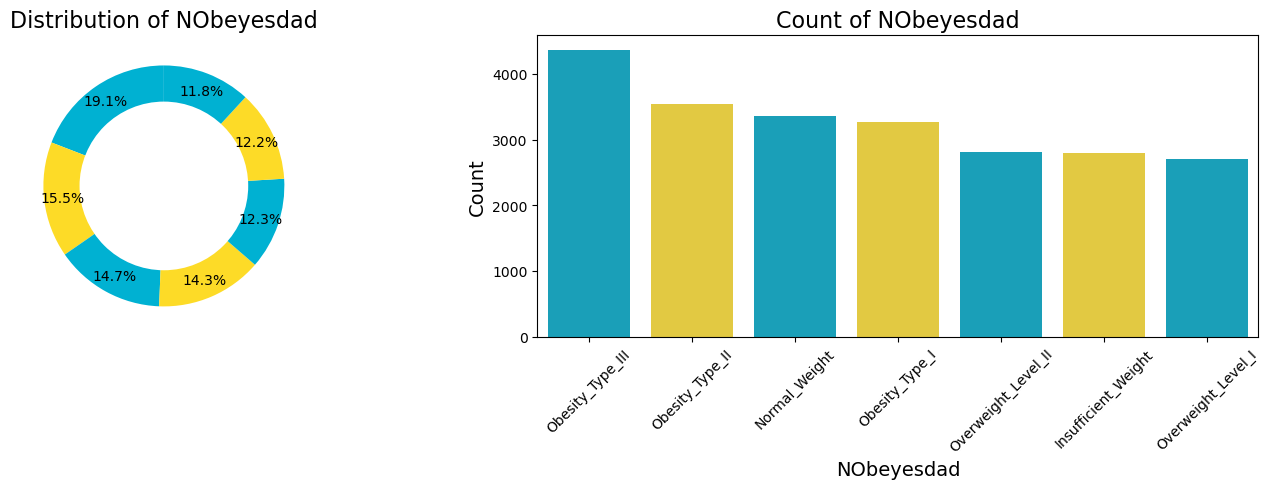

In [16]:
# NObeyesdad Ditribution
single_plot_distribution('NObeyesdad',tr_d)

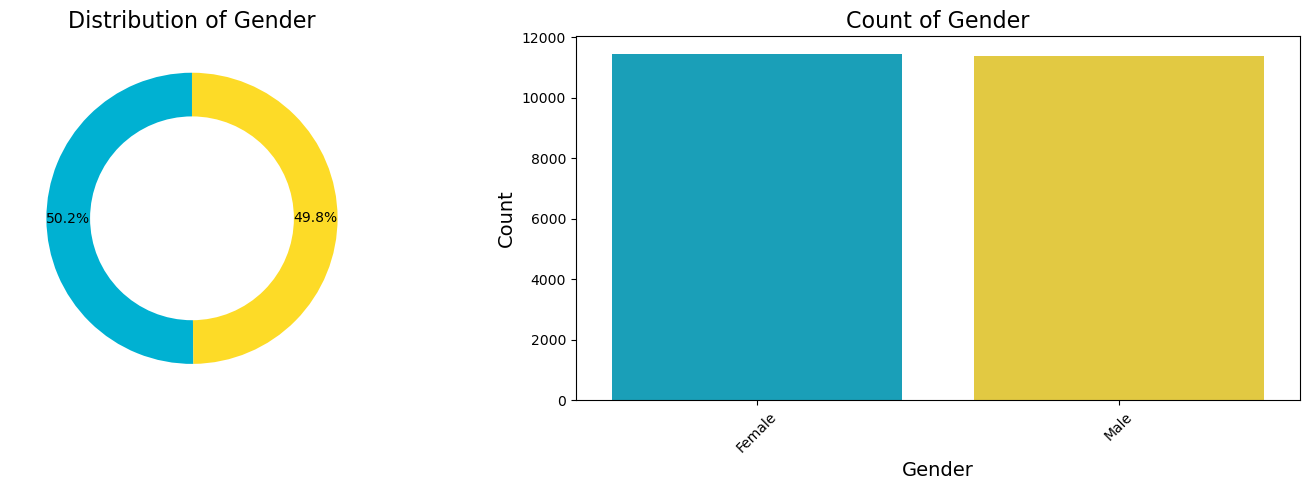

In [17]:
# Gender Ditribution
single_plot_distribution('Gender',tr_d)

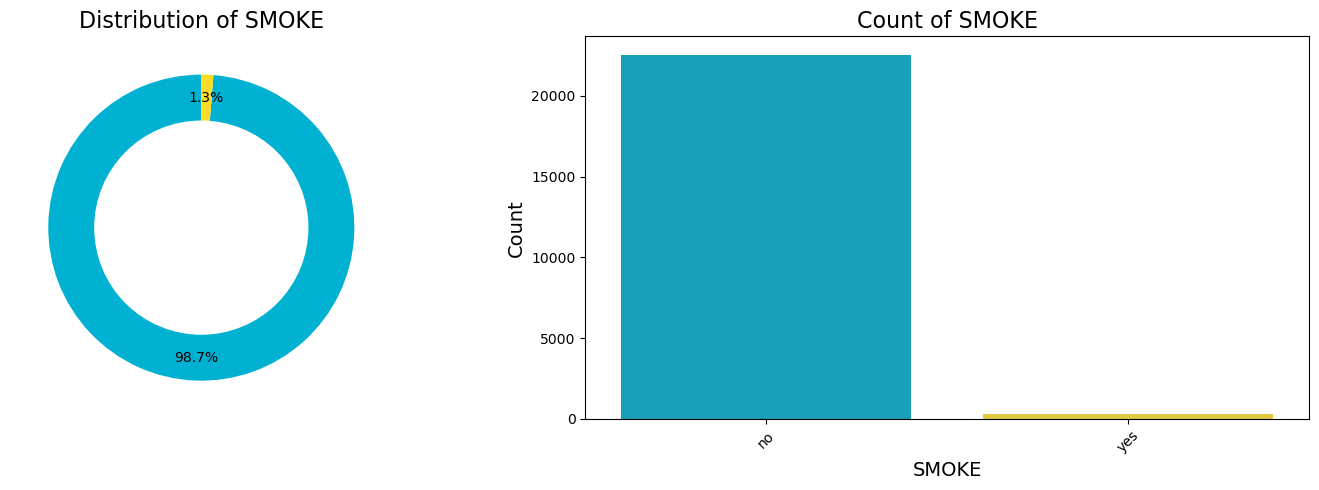

In [18]:
# SMOKE Ditribution
single_plot_distribution('SMOKE',tr_d)

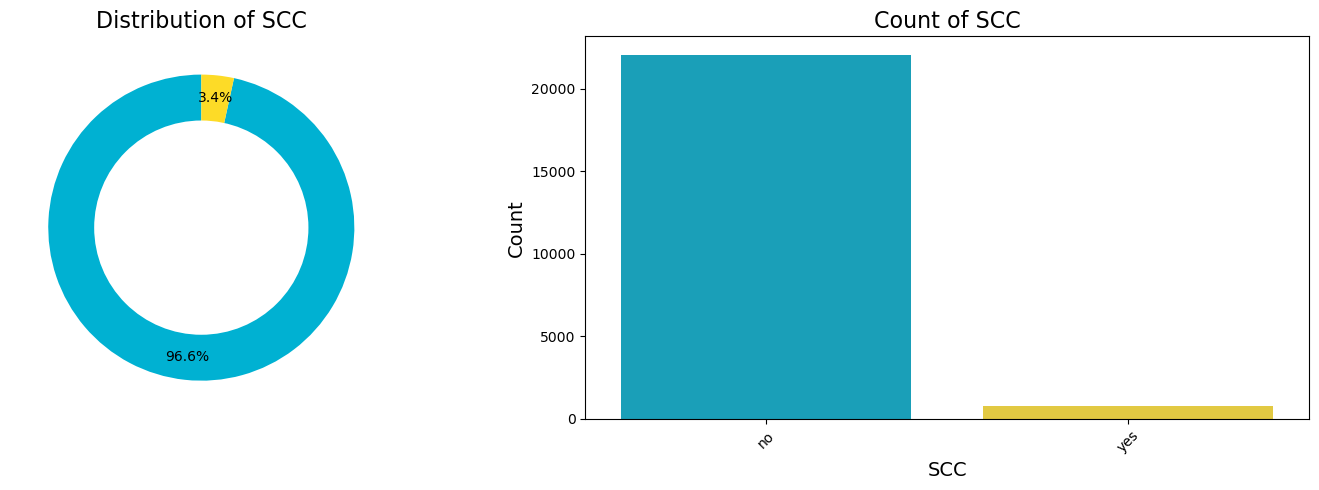

In [19]:
# SCC Ditribution
single_plot_distribution('SCC',tr_d)

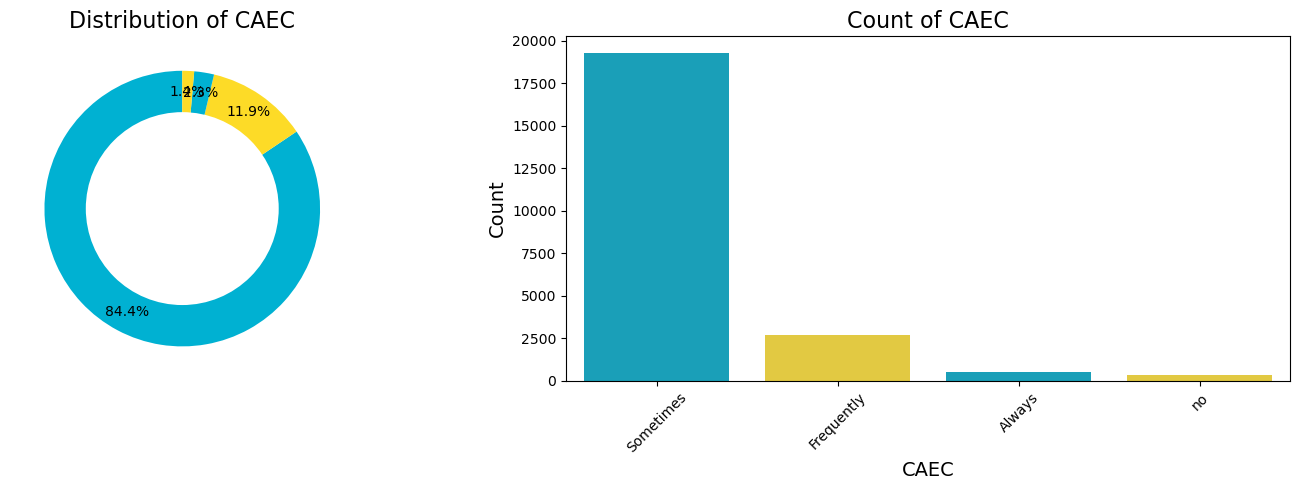

In [20]:
# CAEC Ditribution
single_plot_distribution('CAEC',tr_d)

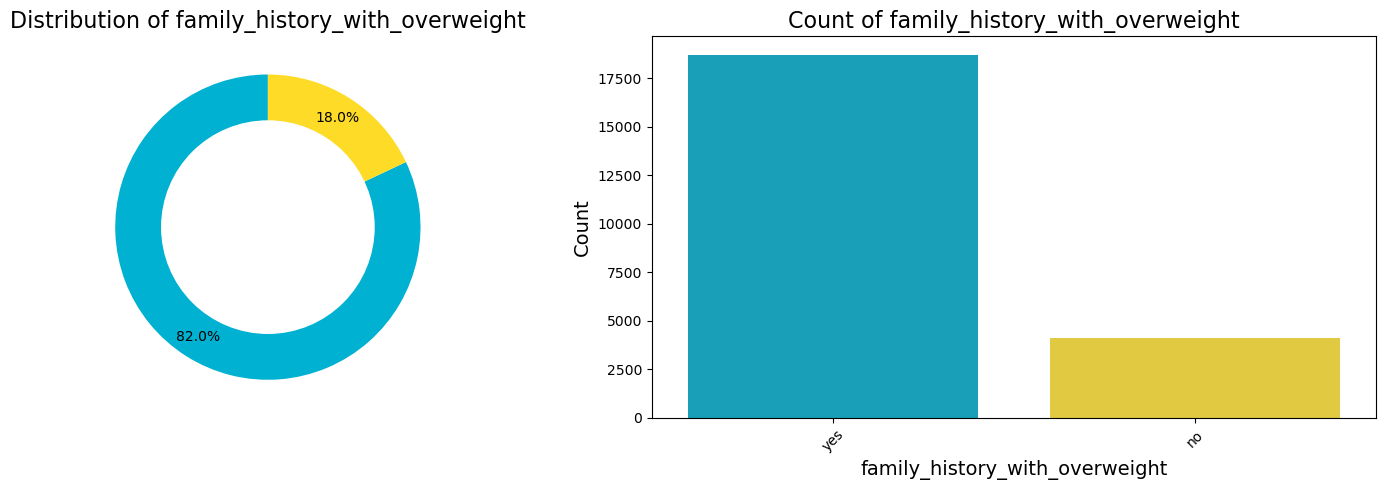

In [21]:
# family_history_with_overweight	 Ditribution
single_plot_distribution('family_history_with_overweight',tr_d)

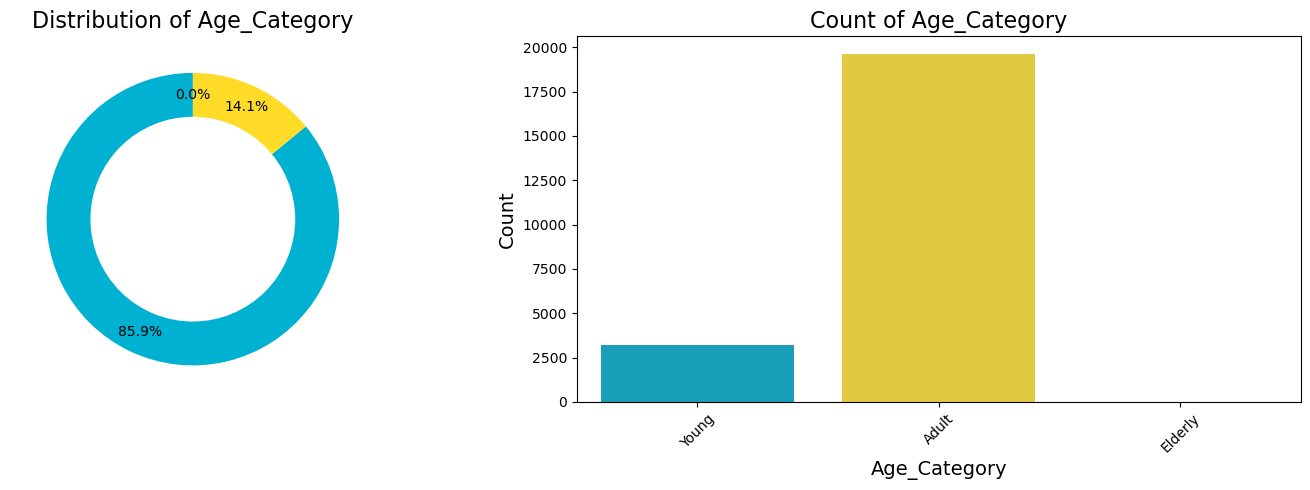

In [22]:
# Age_Category Ditribution
single_plot_distribution('Age_Category',tr_d)

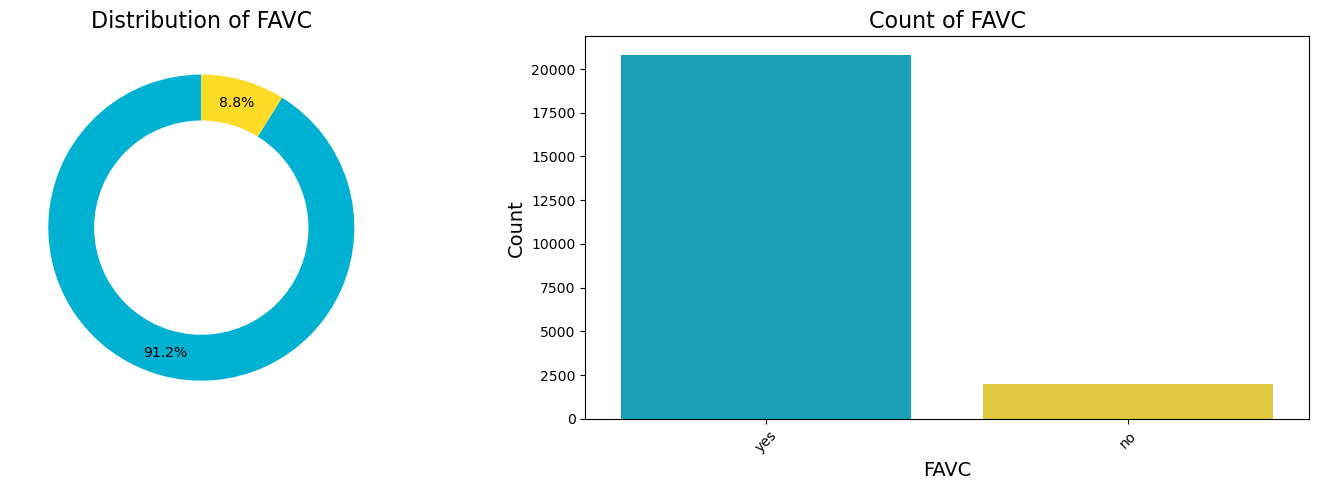

In [23]:
# FAVC Ditribution
single_plot_distribution('FAVC',tr_d)

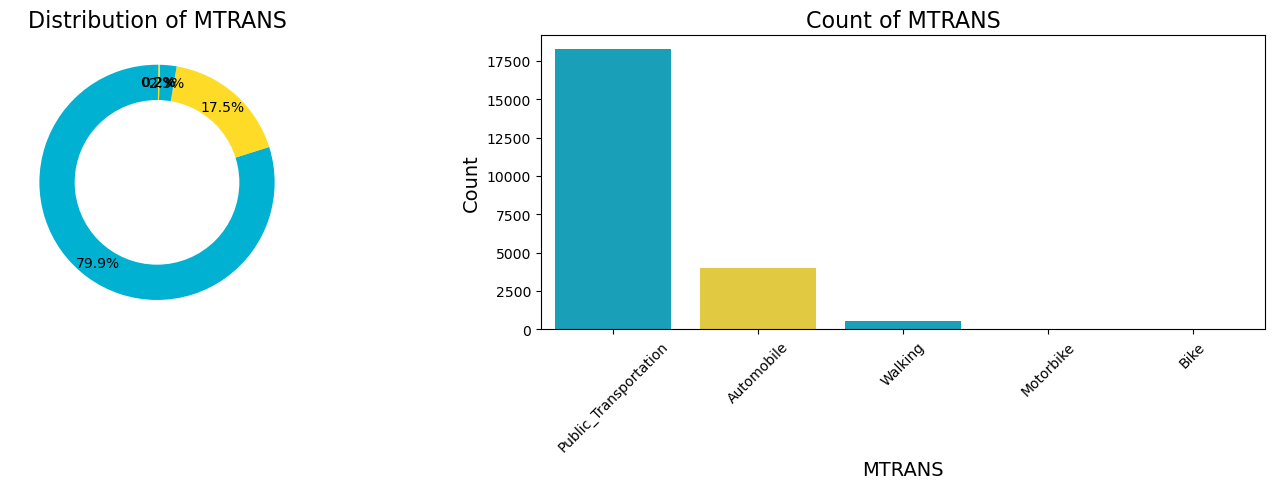

In [24]:
# MTRANS Ditribution
single_plot_distribution('MTRANS',tr_d)

In [25]:
# Scatter Plot to Show Realationship Bw 2 Cols
def advanced_scatter_plot(x_column, y_column, target_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=target_column, data=dataframe, palette=palette[0:3])
    plt.title(f'Scatter Plot of {x_column} vs {y_column} Hue by {target_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=target_column)
    plt.grid(True)
    plt.savefig(f'fig/scatter_{x_column}_{y_column}_{target_column}.png')
    plt.show()

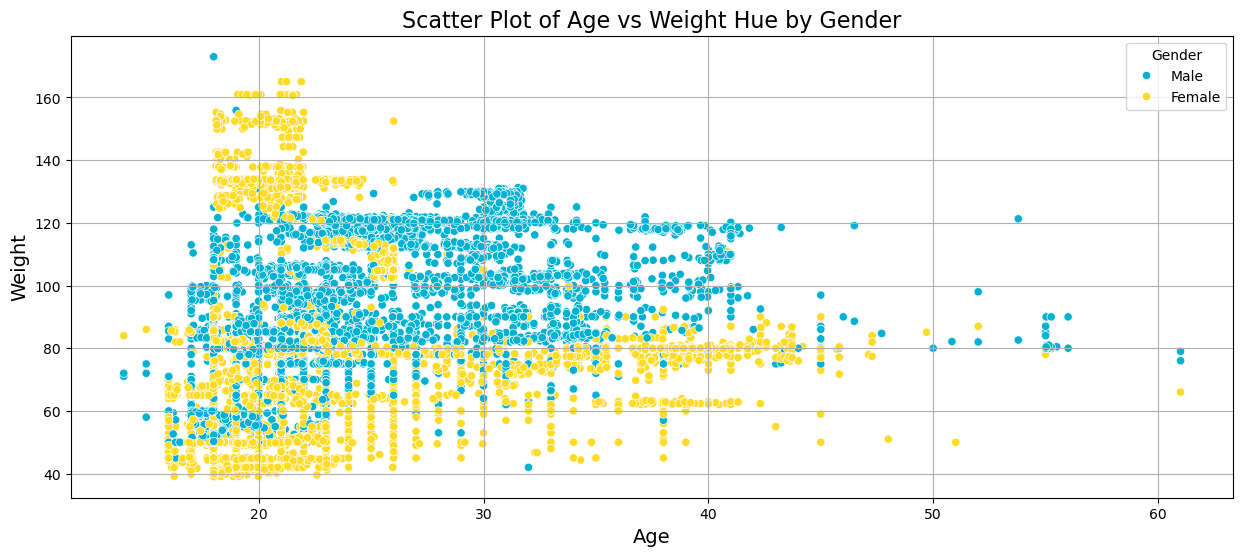

In [26]:
# Scatter Plot | to Show Age vs Weight RealtionShip
advanced_scatter_plot('Age', 'Weight', 'Gender', tr_d)

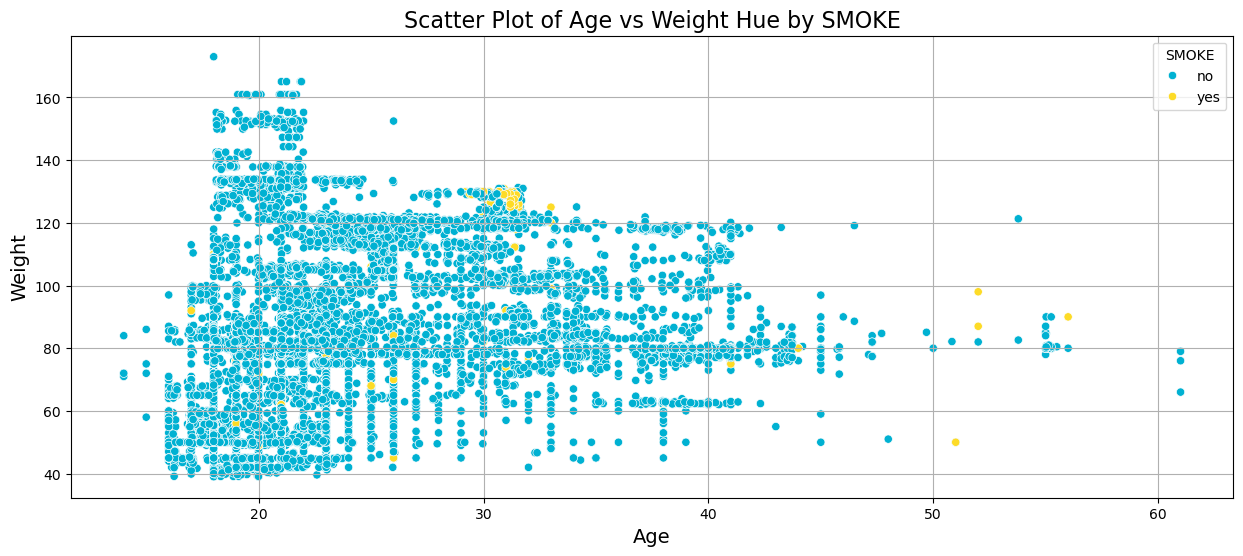

In [27]:
# Scatter Plot | to Show Age vs Weight RealtionShip
advanced_scatter_plot('Age', 'Weight', 'SMOKE', tr_d)

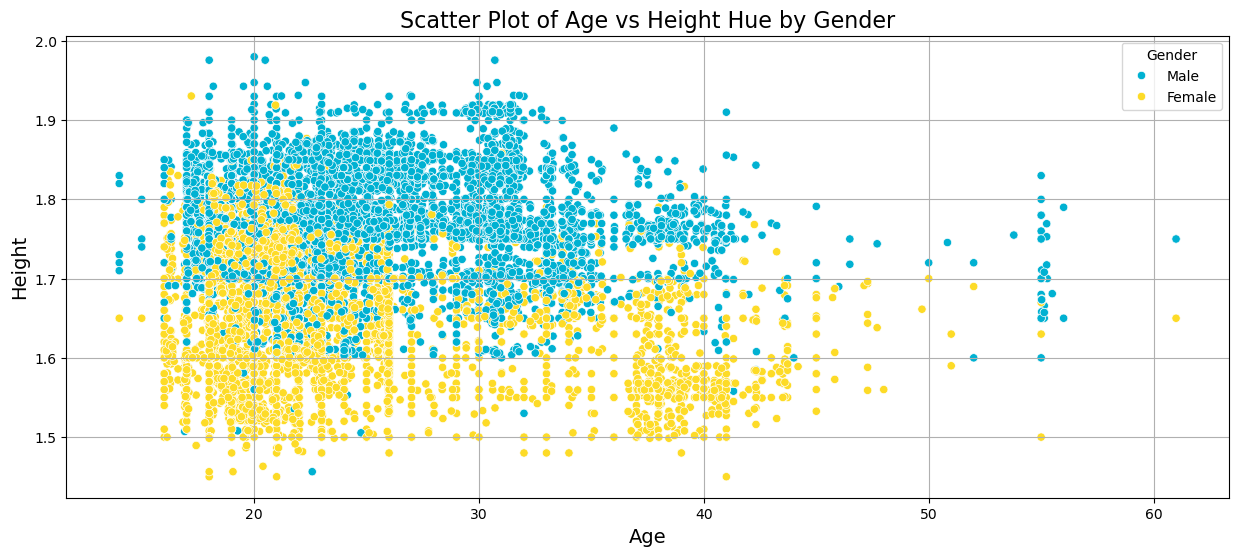

In [28]:
# Scatter Plot | to Show Age vs Height RealtionShip
advanced_scatter_plot('Age', 'Height', 'Gender', tr_d)

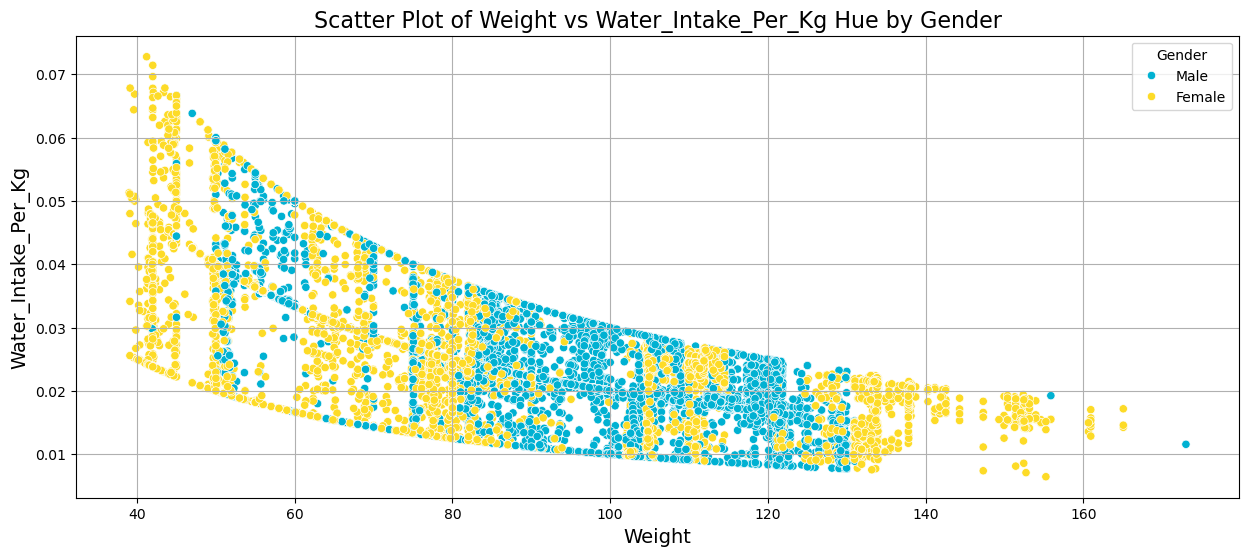

In [29]:
# # Scatter Plot | to Show Weight vs Water_Intake_Per_Kg RealtionShip
advanced_scatter_plot('Weight', 'Water_Intake_Per_Kg', 'Gender', tr_d)

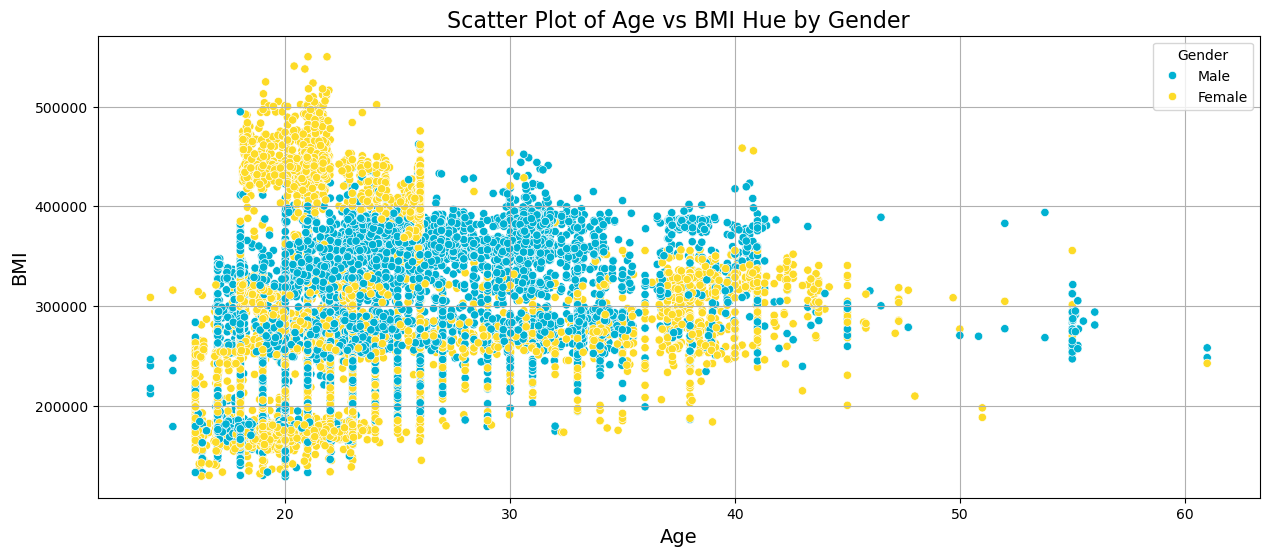

In [30]:
# # Scatter Plot | to Show Age vs BMI RealtionShip
advanced_scatter_plot('Age', 'BMI', 'Gender', tr_d)

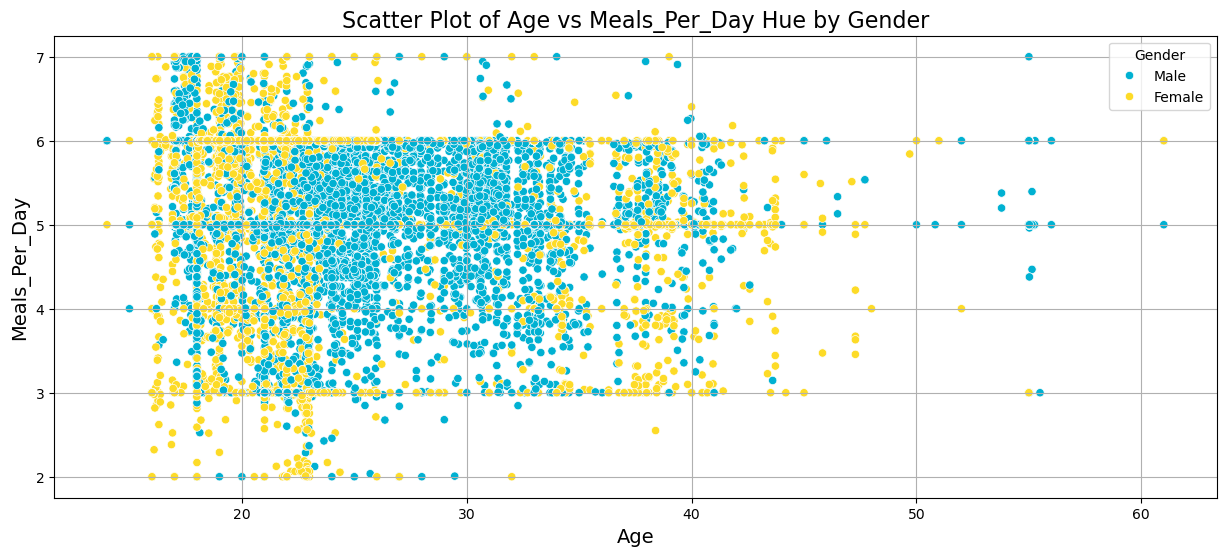

In [31]:
# # Scatter Plot | to Show Age vs Meals_Per_Day RealtionShip
advanced_scatter_plot('Age', 'Meals_Per_Day', 'Gender', tr_d)

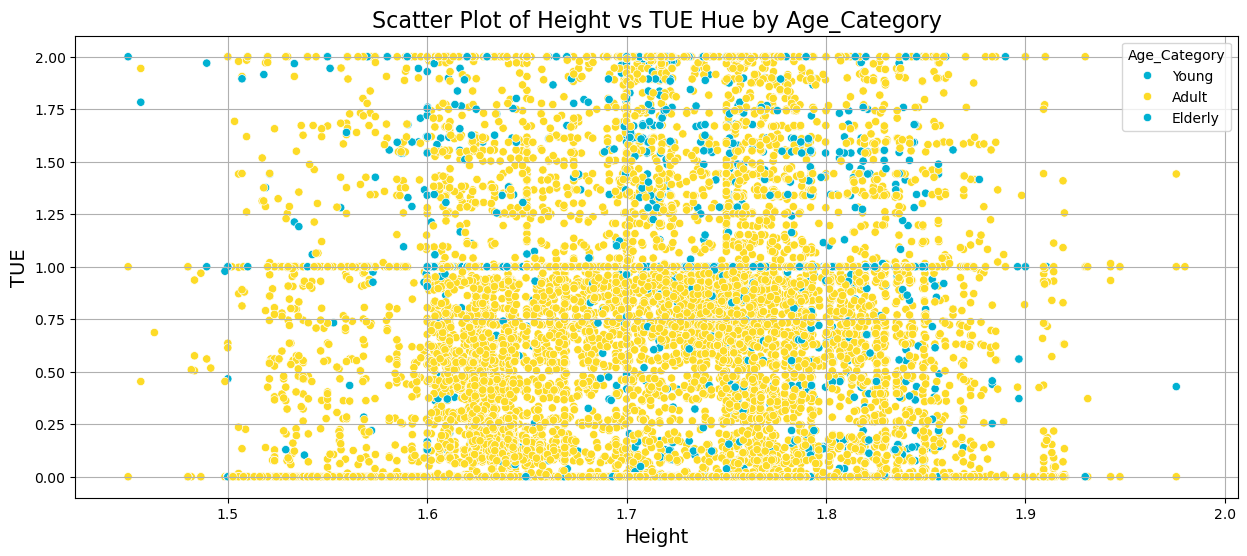

In [32]:
# # Scatter Plot | to Show Height vs TUE RealtionShip
advanced_scatter_plot('Height', 'TUE', 'Age_Category', tr_d)

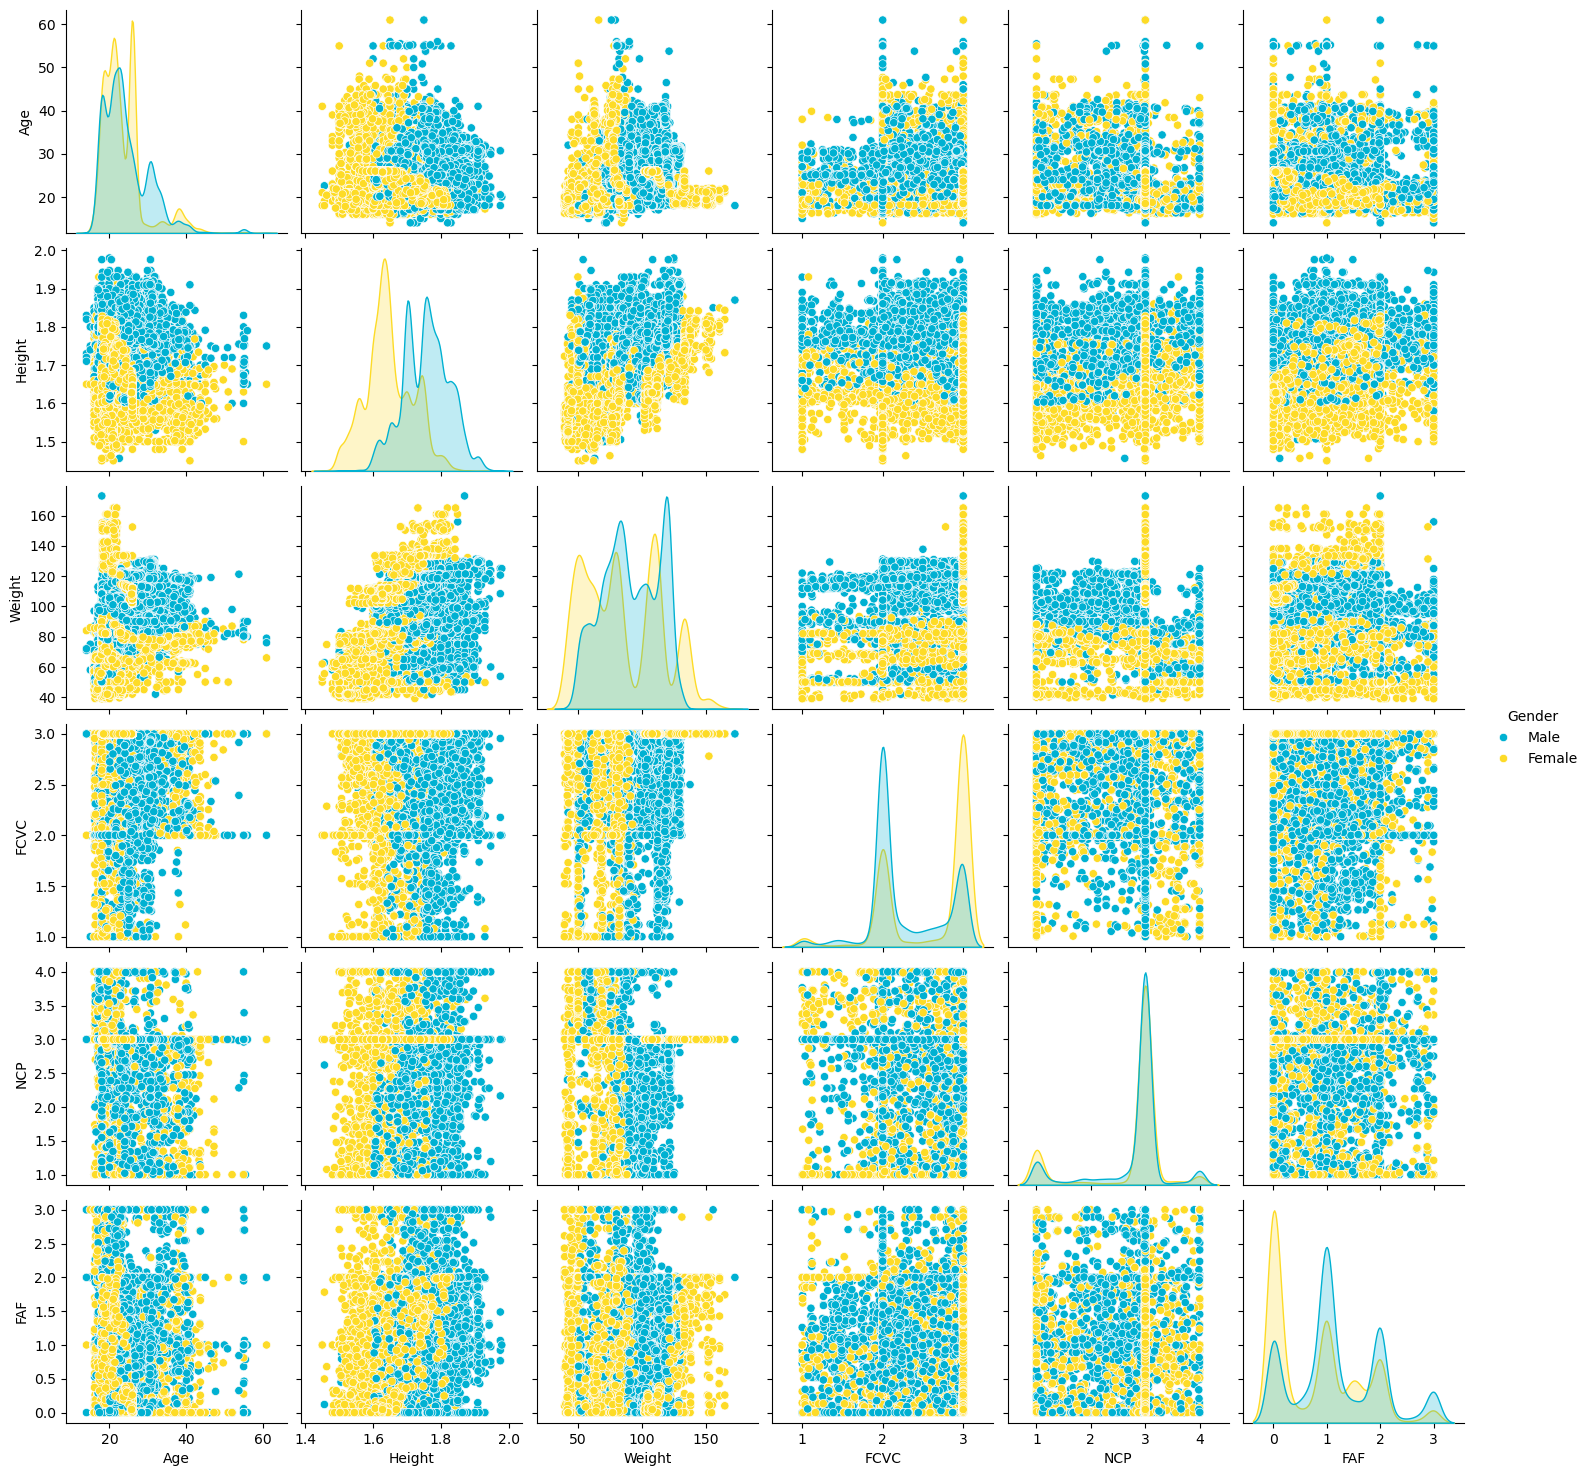

In [33]:
# Cols to Plot
columns_to_plot = ['Gender', 'Age', 'Height', 'Weight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'FAF',
       'CALC', 'MTRANS', 'NObeyesdad',
       'Age_Category', ]

# Data Columns
data_to_plot = tr_d[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = {'Male': palette[0], 'Female': palette[1], 'other': 'gray'}

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Gender', palette=Q_colors)
plt.savefig('fig/pairplot.png')
plt.show()

## Step 6 | Outlier Dedection

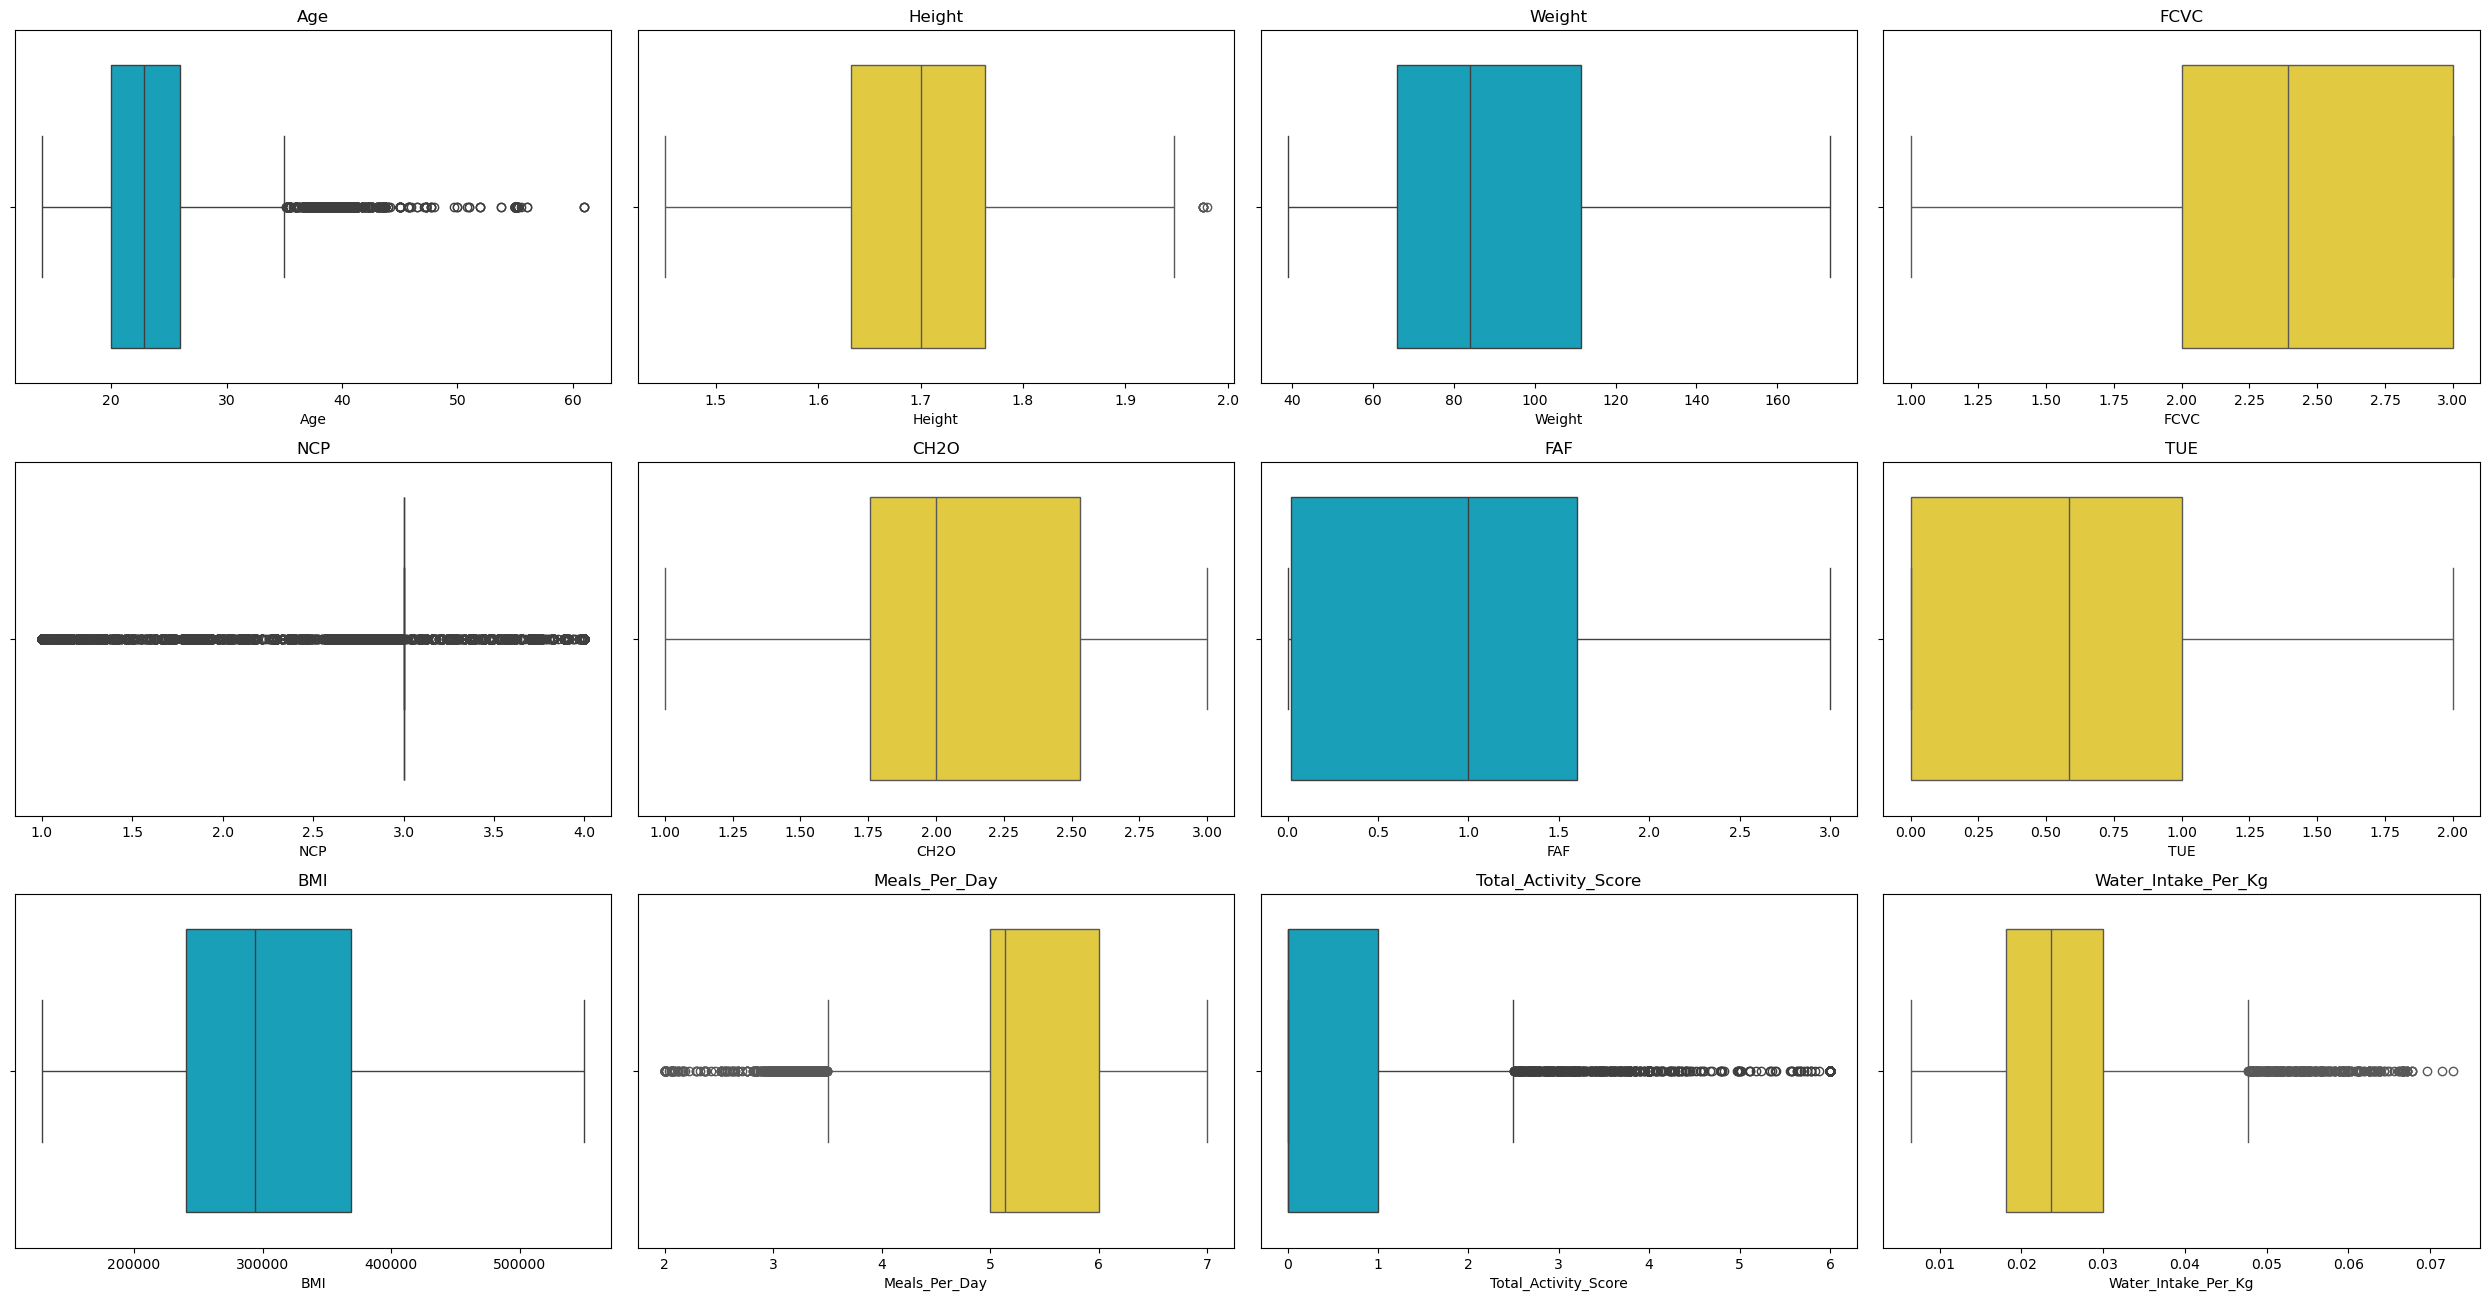

In [34]:
# Num _COLS
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']

# Define the number of rows and columns for subplots
num_rows = 4  # 4 rows
num_cols = 4  # 4 columns

# Create subplots with appropriate titles
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

# Paellet
palettes = ["rgb(0, 177, 210)", "rgb(253, 219, 39)"]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, col in enumerate(NUM_COLS_F[:num_rows * num_cols]):
    sns.boxplot(x=tr_d[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(len(NUM_COLS_F), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('fig/boxplots_outliers.png')
plt.show()

## Step 7 | Numerical Feature Distribution 

In [35]:
# Function to Plot Numerical Distribution
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Gender', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten()
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)

        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'

        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

    # Set Tight Layout
    plt.tight_layout()
    plt.savefig('fig/numerical_distributions.png')
    # Show the plot
    plt.show()

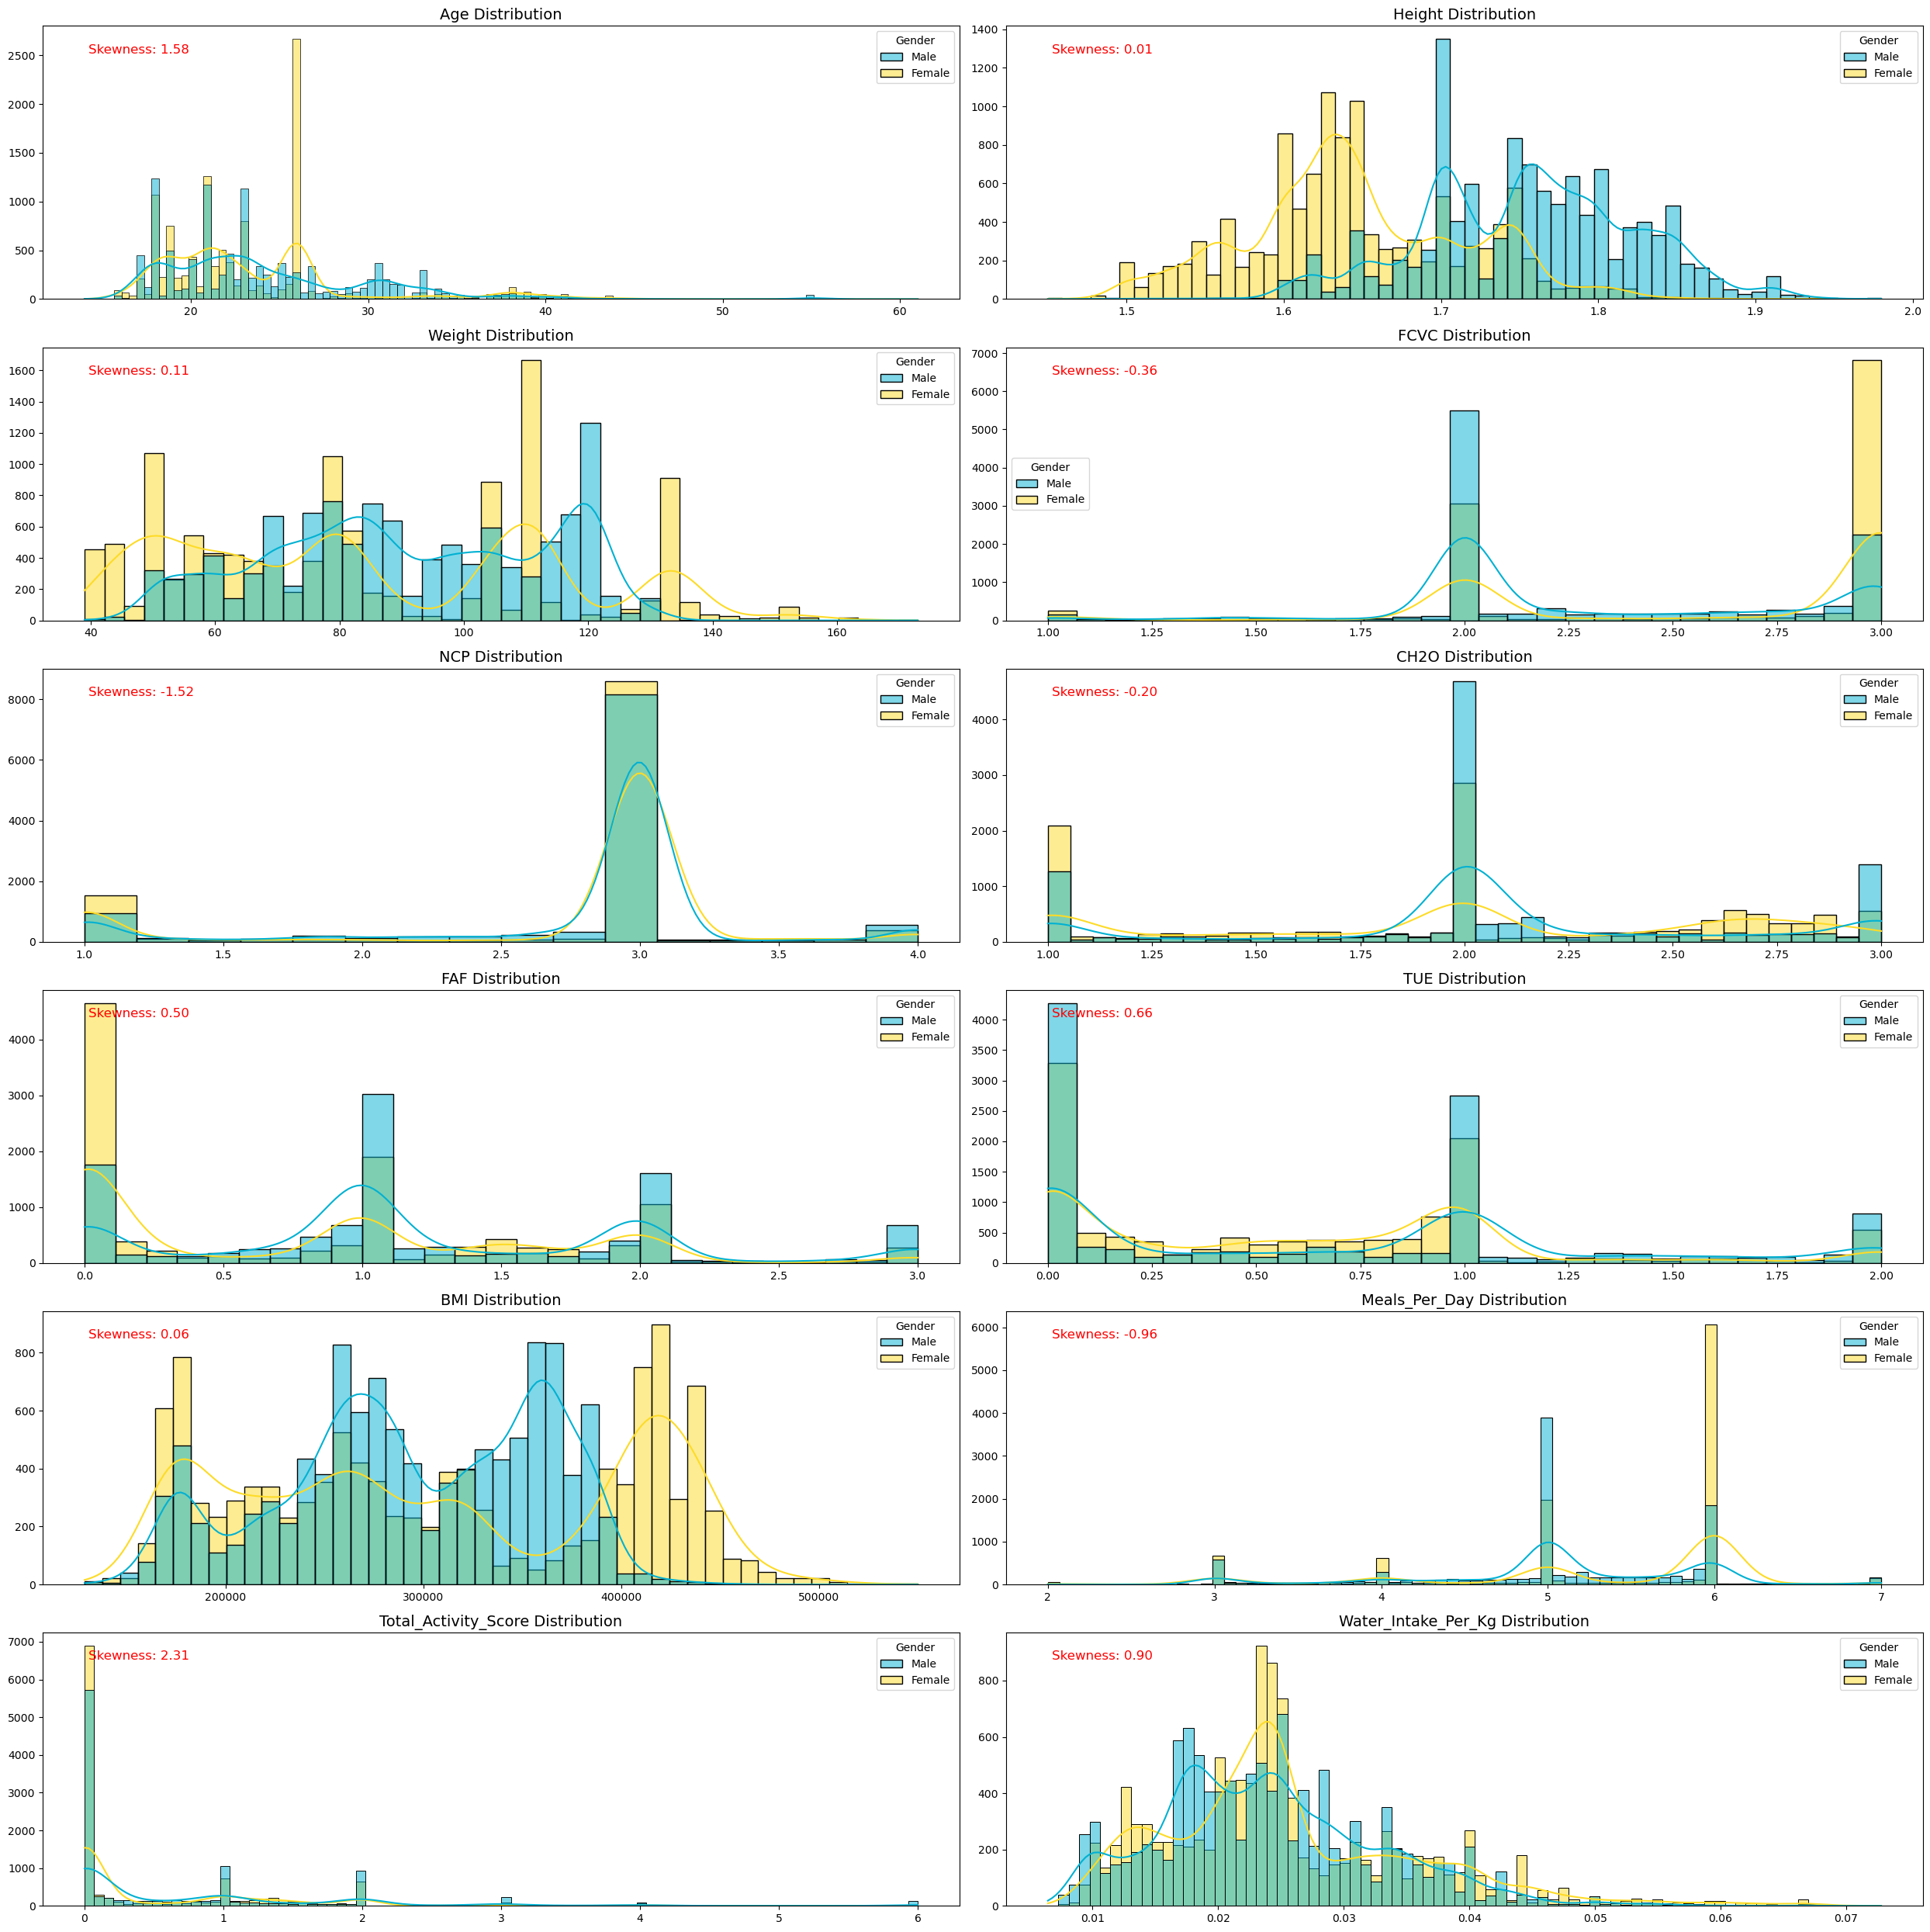

In [36]:
# Cols to Plot
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(tr_d,NUM_COLS_F,'Gender')

## Step 7.1 | Normalization

In [37]:
# Function to Scale Data
def apply_scaling(data, columns, scaler_type):
    # Check the type of scaler and initialize the appropriate scaler object
    if scaler_type == 'S':
        scaler = StandardScaler()  # Initialize StandardScaler
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  # Initialize MinMaxScaler
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')  # Initialize QuantileTransformer
    else:
        raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

    # Create a copy of the input data to avoid modifying the original data
    scaled_data = data.copy()

    # Loop through each column to be scaled
    for col in columns:
        # Apply the scaler to the current column and update the data with the scaled values
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])

    # Return the scaled data
    return scaled_data

# Specify columns and scaler type
columns_to_scale = [col for col in tr_d.columns if tr_d[col].dtype == 'float']
scaler_type = 'Q' 

# Apply scaling to training data
tr_d = apply_scaling(tr_d, columns_to_scale, scaler_type)
# Apply the same scaling to testing data
te_d = apply_scaling(te_d, columns_to_scale, scaler_type)
PrintColor('Data Scaled Done')

Data Scaled Done


## Step 8 | Correlation Analysis

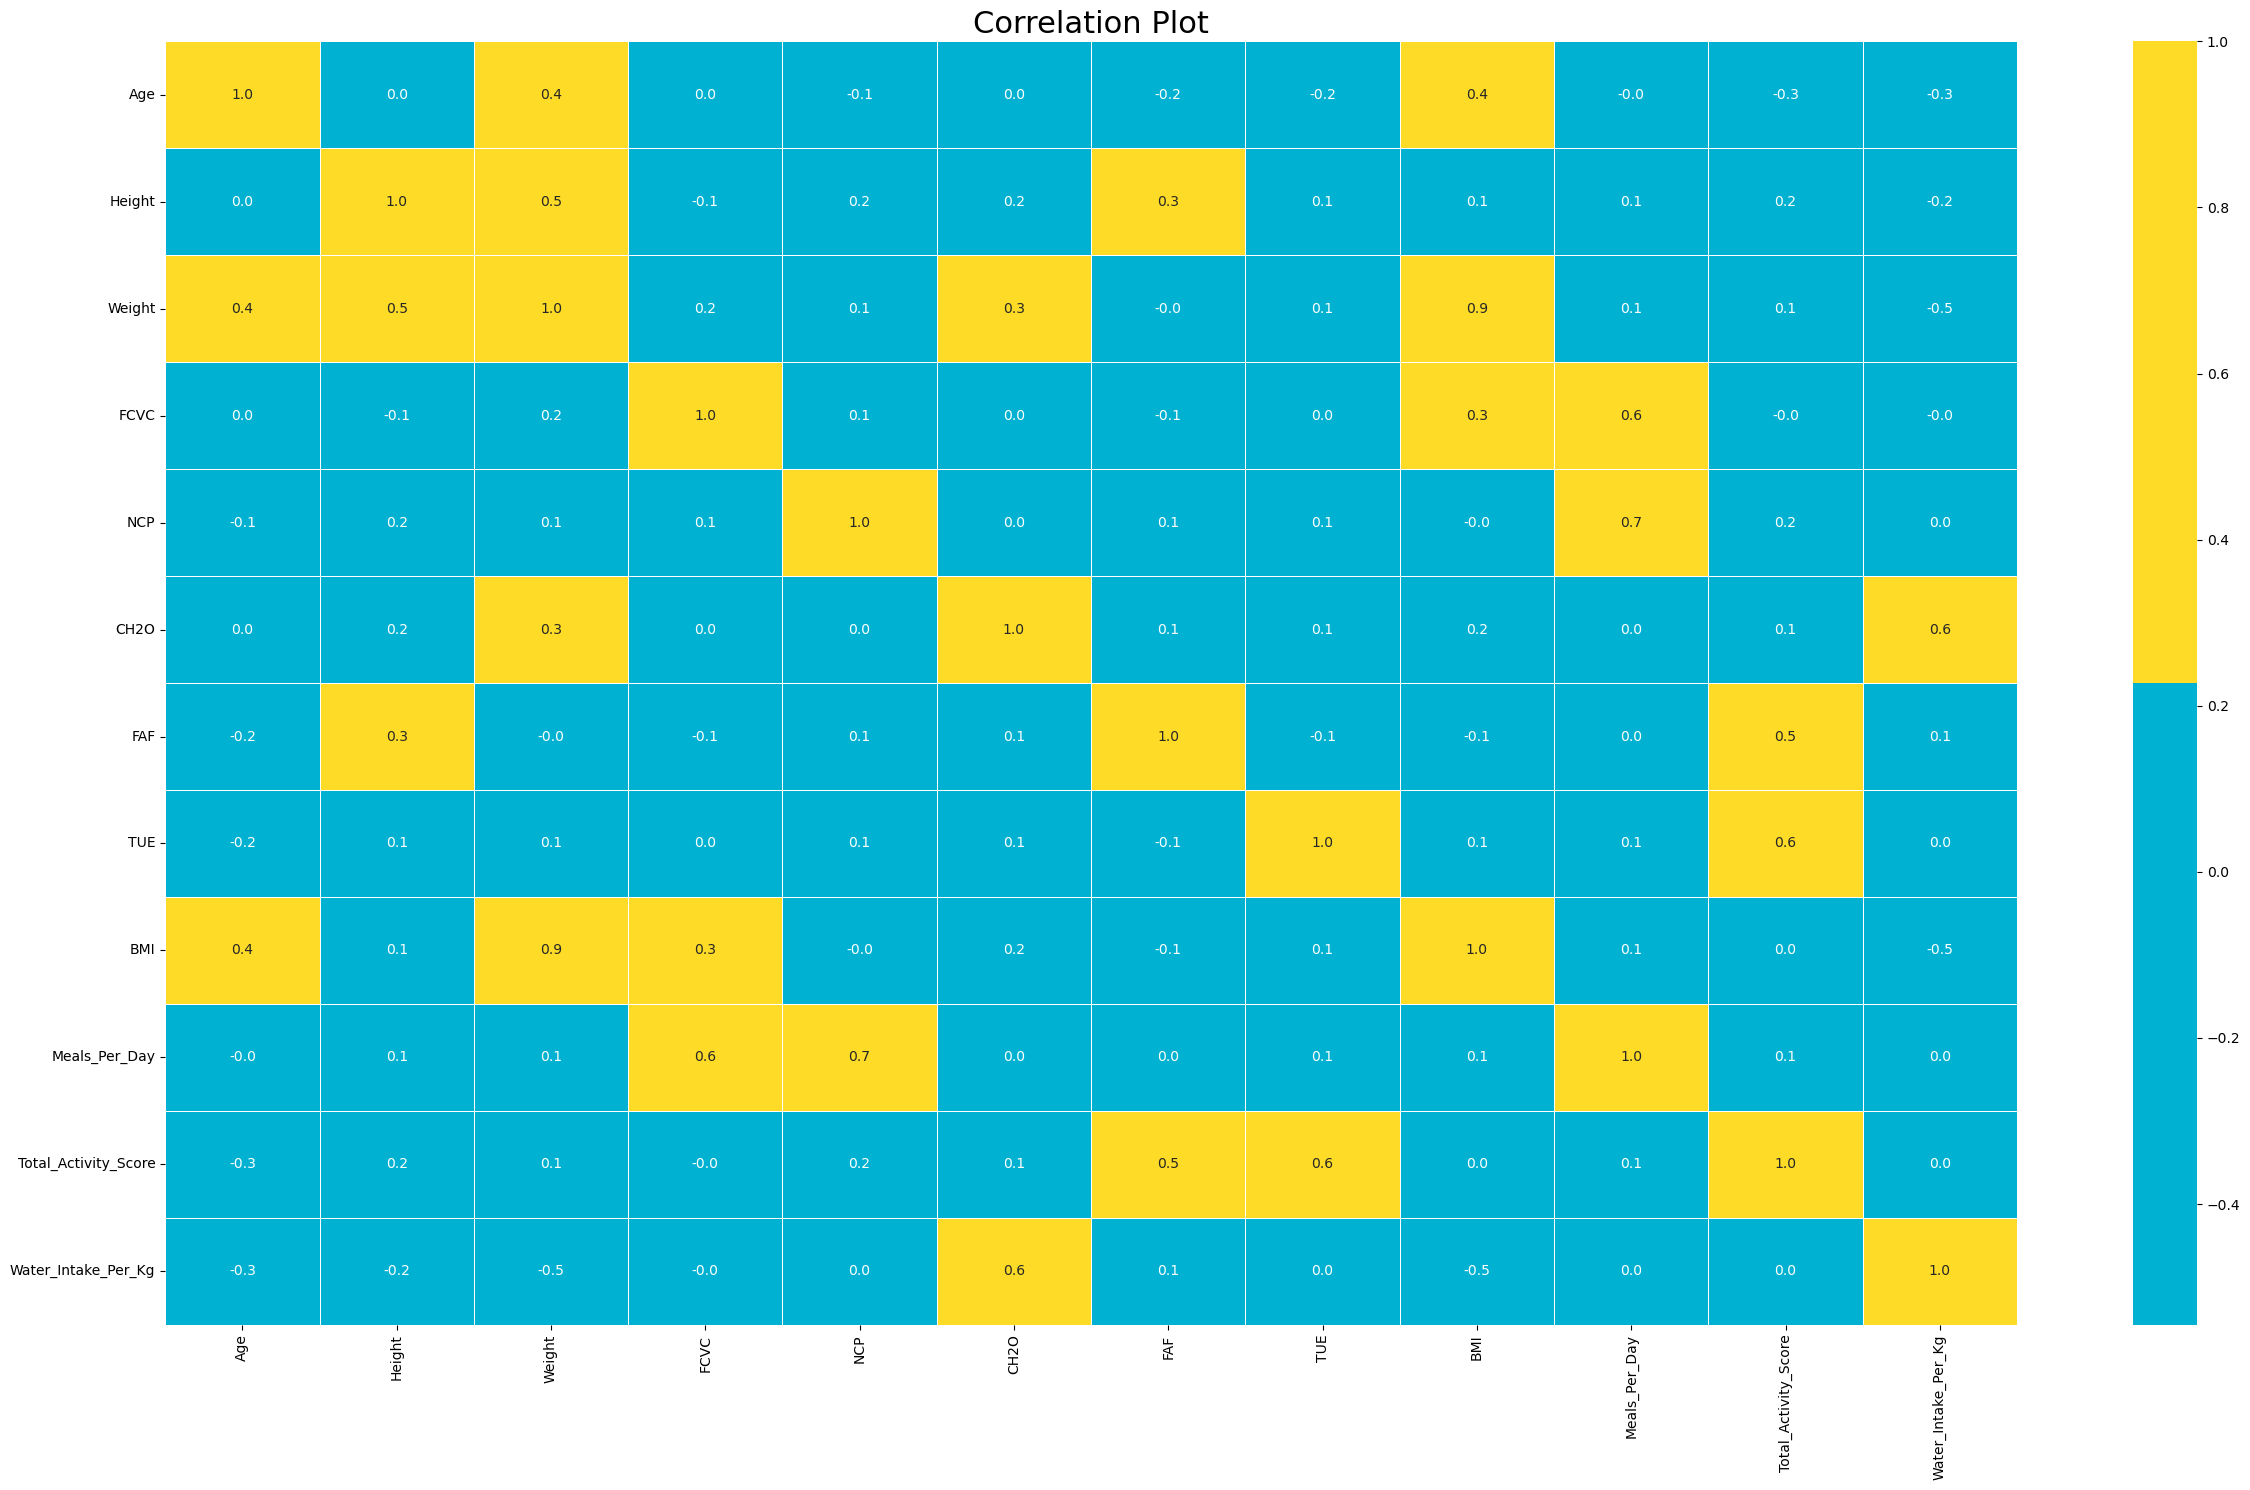

In [38]:
# Select only numeric columns
N_d = tr_d.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".1f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)
plt.tight_layout()
plt.savefig('fig/correlation_heatmap.png')
plt.show()

## Step 9 | Encoding

In [39]:
# Defining the categorical columns to encode
CAT_COL_E = [
 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
]
# Function to Encode Data 
def E_D(data, columns, method='L'):
    encoded_data = data.copy()  # Make a copy of the input data
    
    if method == 'L':
        # Initialize LabelEncoder
        L_E = LabelEncoder()
        
        # Encode categorical columns using LabelEncoder
        for col in columns:
            encoded_data[col] = L_E.fit_transform(encoded_data[col])
    
    elif method == 'D':
        # Create dummy variables for categorical columns
        dummy_cols = pd.get_dummies(encoded_data[columns], prefix=columns)
        
        # Concatenate dummy variables with original data
        encoded_data = pd.concat([encoded_data, dummy_cols], axis=1)
        
        # Drop the original categorical columns
        encoded_data = encoded_data.drop(columns, axis=1)
    
    else:
        raise ValueError("Invalid method! Please choose either 'L' or 'D'.")
    
    return encoded_data

In [40]:
# Encoder Train and test
tr_d = E_D(tr_d, CAT_COL_E , 'D')
te_d = E_D(te_d, CAT_COL_E, "D")
PrintColor('Data is Encoded Successfully')

Data is Encoded Successfully


## Step 10 | Model Building

In [41]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = tr_d.drop('NObeyesdad', axis=1)
y_T = tr_d['NObeyesdad']

# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")

Training set shape - X: (20560, 36), y: (20560,)
Testing set shape - X: (2285, 36), y: (2285,)


## LightGBM Classifier

#### ***Special Note :***
- The Params Used are tunned Using Optuna. 

#### ***Code Working***
```python
L_BASE = lgb.LGBMClassifier(**lgb_params)
```
This line creates an instance of the LightGBM classifier (`L_BASE`) with the specified parameters (`**lgb_params`).

```python
V_CV = cross_val_score(L_BASE,
                       X_T, 
                       y_T, 
                       scoring='roc_auc',
                       cv=10, 
                       n_jobs=-1)
```
Using cross-validation (`cross_val_score`), we evaluate the performance of the LightGBM classifier (`L_BASE`) on the training data (`X_T`, `y_T`) using Accuracy as the scoring metric. We perform 10-fold cross-validation (`cv=10`) and utilize all available CPU cores (`n_jobs=-1`).

```python
print_heading(f"The Average Accuracy Of LGB Classifier is : {V_CV.mean()}")
```
Finally, we print the average ROC AUC score of the LightGBM classifier calculated from the cross-validation results stored in `V_CV.mean()`. The `print_heading` function is used to format the output with a header.

In [42]:
# # # =================================================================================================================
# # #                         Params < LGB Classifier
# # #==================================================================================================================
lgb_params = {
 'n_estimators': 899,
 'learning_rate': 0.013003893032117776,
 'max_depth': 18,
 'reg_alpha': 0.9218377389528793,
 'reg_lambda': 0.020694654173173645,
 'num_leaves': 24,
 'subsample': 0.7402011916024158,
 'colsample_bytree': 0.25484261764678784,
 'verbose' : -1
}
# # # =================================================================================================================
# # #                        Train < LGB Classifier
# # #==================================================================================================================
L_BASE = lgb.LGBMClassifier(**lgb_params)
V_CV = cross_val_score(L_BASE,
                       X_T,
                       y_T,
                       scoring='accuracy',
                       cv=15,
                       n_jobs=-1)
# # # =================================================================================================================
# # #                        ROC AUC < LGB Classifier
#==================================================================================================================
print_boxed_blue_heading(f"The AUCCURACY Of LGB Classifier is : {V_CV.mean()}")
# # # =================================================================================================================
# # #                        Submission < LGB Classifier
# # #==================================================================================================================
# Fit Again
L_BASE.fit(X_T,y_T)
# Save Model
import joblib
joblib.dump(L_BASE, 'model/lightgbm_obesity.pkl')
# Pred
T_P = L_BASE.predict(te_d)

# Submission File
SUB = pd.DataFrame({'id': d_s['id'], 'NObeyesdad': T_P})
# Save Submission File
SUB.to_csv('submission_O_R_0.9000.csv', index=False)
PrintColor('Submission File Saved ! Hurray')


| The AUCCURACY Of LGB Classifier is : 0.9164806303348653 |


  File "c:\Users\omcho\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\omcho\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\omcho\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\omcho\anaconda3\Lib\subprocess.

Submission File Saved ! Hurray


## CatBoost Classifier

In [44]:
# # # =================================================================================================================
# # #                        Params < CAT Classifier
# # #================================================================================================================== 
cat_params = {
    'n_estimators': 853,
    'learning_rate': 0.10899577626375372,
    'depth': 7,
    'colsample_bylevel': 0.7340962061535496,
    'random_strength': 6.262882561405091,
    'min_data_in_leaf': 92,
    'verbose': 0,
    'loss_function': 'MultiClass',
    'eval_metric': 'MultiClass',
}  

# Specify categorical features
cat_features = ['Age_Category']  # Add the categorical features here

# # # =================================================================================================================
# # #                        Train < CAT Classifier
# # #================================================================================================================== 
C_BASE = CatBoostClassifier(**cat_params, cat_features=cat_features)
C_CV = cross_val_score(C_BASE,
                       X_T, 
                       y_T, 
                       scoring='accuracy',
                       cv=5, 
                       n_jobs=-1)
# # # =================================================================================================================
# # #                        ROC AUC < CAT Classifier
# # #================================================================================================================== 
print_boxed_blue_heading(f"The Accuracy Of CatBoost Classifier is: {C_CV.mean()}")


| The Accuracy Of CatBoost Classifier is: 0.9094331363536879 |


 

##   Final Technical Conclusion

- **Data Integrity**: Clean dataset of ~22.8k records, no nulls, duplicates removed. Balanced categorical target across 7 obesity levels.  
- **Feature Engineering**: Derived **BMI**, **Meals_Per_Day**, **Total_Activity_Score**, **Age_Category**, and **Water_Intake_Per_Kg** significantly enhanced predictive signal.  
- **EDA Findings**:  
  - Gender split ~50/50.  
  - High-calorie food intake prevalent (~91%).  
  - Smoking rare (~1.3%).  
  - Majority rely on public transport (~80%).  
- **Model Benchmarking**:  
  - **Gradient Boosting** → CV Accuracy **91.43%** (best performer).  
  - **XGBoost** → CV Accuracy **91.07%**.  
  - **Random Forest** → CV Accuracy **91.00%**.  
  - Logistic Regression and KNN close behind (~90%).  
  - Decision Tree, SVM, Naive Bayes underperformed (<88%).  
- **Result**: Ensemble methods (GB, XGB, RF) dominate due to their ability to capture **non-linear feature interactions** and resist overfitting.  
- **Key Drivers**: BMI, Age Category, Physical Activity, Family History, and Dietary Habits are the most influential predictors.  
- **Deployment Readiness**: Gradient Boosting/XGBoost models are production-ready with high generalization, interpretable feature importance, and robust accuracy.

---

###   Sharp Takeaway
**Gradient Boosting is the optimal classifier for obesity level prediction, achieving >91% accuracy with engineered features. Ensemble learning clearly outperforms simpler baselines, validating the technical pipeline from EDA → Feature Engineering → Normalization → Model Tuning.**

 